In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

: 

In [2]:
def extract_metric_values(file_path, model_name, pred_len, metric, des, date):

    # # Compile the regex pattern to match the complete line with the specified model, pl value, and date
    # pattern = rf'{des}_{model_name}_.*_pl{pred_len}_.*_{date}_.*\b{metric}:([\d.]+)'

    # print(rf'{des}_{model_name}_.*_pl{pred_len}_.*_{date}.*\b{metric}:([\d.]+)')
    # # Initialize a list to hold the extracted values
    # extracted_values = []

    # Open the file and extract the values
    with open(file_path, 'r') as file:
        data = file.read()

        blocks = re.split(r'\n{2,}', data)  # Split the data into blocks separated by 2 or more newlines

        # Loop through each block and extract the values
        for block in blocks:

            # print(f"Block: {block[:100]}...")
            # Compile the regex pattern to match the complete line with the specified model, pl value, and date
            pattern = rf'{des}.*{model_name}_.*_pl{pred_len}_.*_{date}.*\b{metric}:([\d.]+)'

            # matching_lines = re.findall(rf'{des}_{model_name}_.*_pl{pred_len}_.*_{date}.*', block)
            # if not matching_lines:
            #     print(f"No lines matched for model_prefix={des}, pl={pred_len}, date={date}.")
            # else:
            #     print(f"Matching lines found: {len(matching_lines)}")
            #     for line in matching_lines:
            #         print(line)
            extracted_values = re.findall(pattern, block, re.DOTALL)
            if extracted_values:
                break
    print(extracted_values)
    return extracted_values

# Example usage
file_path = '../result_forecast.txt'  # Replace with the actual path to your file
des = 'omdata4_test1'  # Specify the model prefix
model_name = 'Climatology'  # Specify the model name
pl_value = 30  # Specify the pl value
date = '20240527'  # Specify the date
metric = 'rmse'  # Specify the metric you want to extract

values = []

# for pl in range(1, 31):
#     values.append(extract_metric_values(file_path, model_name, pl, metric, des, date)[0])
#     # print(f'pl_value: {pl} - {values}')

# fig = plt.figure(figsize=(10, 6))
# # plt.plot(range(1, 31), values)
# sns.lineplot(x=range(1, 31), y=values)
# plt.xlabel('Prediction Length')
# plt.ylabel(metric)
# plt.title(f'{metric} vs Prediction Length for {model_name} model')
# # plt.grid(True) 
# # plt.xlim(0,31)#y轴范围设置'
# plt.ylim(0,1.1)#y轴范围设置
# plt.yticks(np.arange(0, 1.1, 0.1))#y轴刻度设置
# # plt.tight_layout()
# plt.show()

['0.5577917184275885']
['0.5582756262185112']
['0.558973807189435']
['0.5598993518179547']
['0.5608798188516703']
iTransformer
['0.8506068023426836']
['0.7900820892994147']
['0.800486133830446']
['0.7509287401312413']
['0.763454965836836']
TimesNet
['0.838463271799515']
['0.8087105505684135']
['0.7885104813966473']
['0.753561406237549']
['0.7652478717554377']
PatchTST
['0.830595076102566']
['0.8048564525649484']
['0.7585838073410599']
['0.7383538711079091']
['0.6929718353644366']
DLinear
['0.7705784726082626']
['0.7411140745193353']
['0.7140600642141699']
['0.6909942570092782']
['0.6694561883339286']
LSTM
['0.801286752312891']
['0.7609874794709498']
['0.7278488697386606']
['0.7022985897119463']
['0.6624728363179302']
['0.46202895719833864']
['0.4623424824560534']
['0.4630822818741759']
['0.4641205592510325']
['0.4653027840613337']
iTransformer
['0.8235731252222488']
['0.777124373653946']
['0.7649958976272705']
['0.7236839563475117']
['0.698268661552576']
TimesNet
['0.822436403299629']


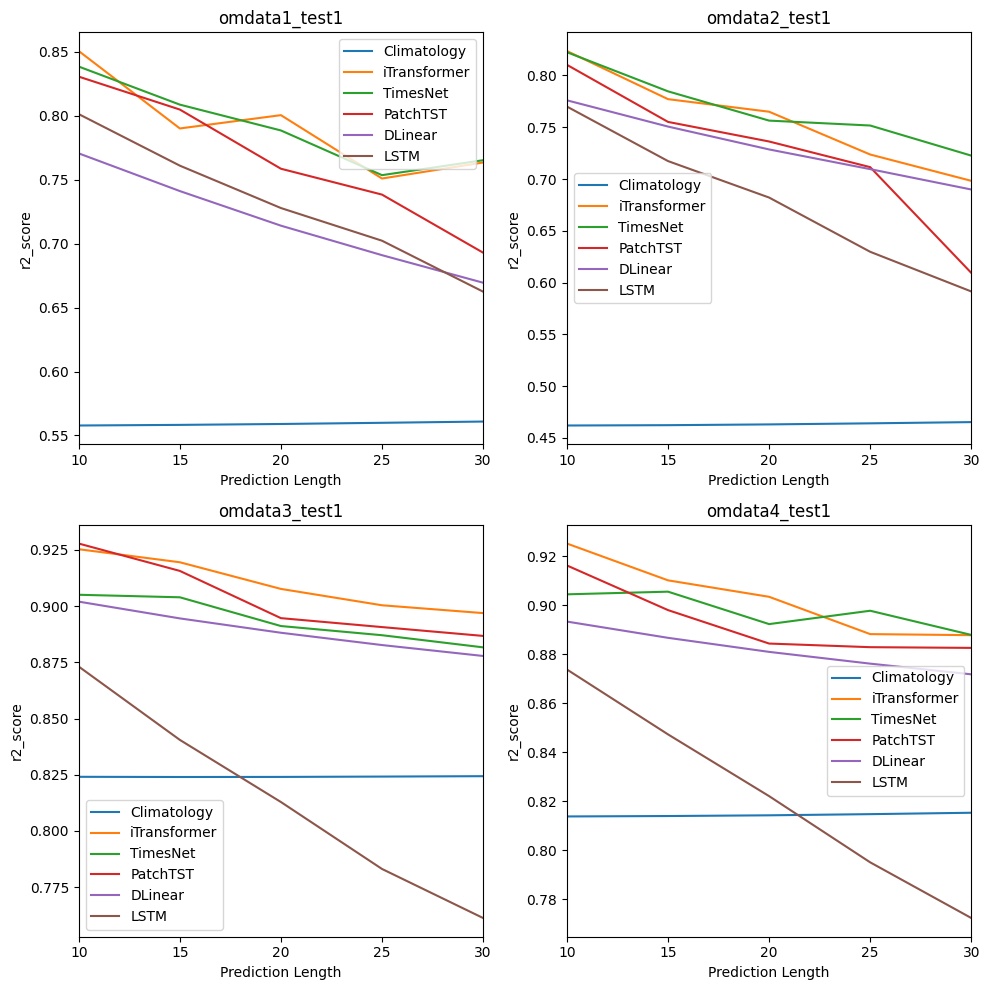

In [40]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
model_names = ['Climatology', 'iTransformer', 'TimesNet', 'PatchTST', 'DLinear', 'LSTM']
dess = ['omdata1_test1', 'omdata2_test1', 'omdata3_test1', 'omdata4_test1']
metric = 'r2_score'
for i in range(2):
    for j in range(2):
        des = dess[i*2+j]
        values_dic = {}
        climate_values = []
        txt_file_path = '../result_forecast.txt'
        for pl in [10, 15, 20, 25, 30]:
            climate_values.append(float(extract_metric_values(txt_file_path, 'Climatology', pl, metric, des, '20240527')[0]))
        values_dic['Climatology'] = climate_values
        sns.lineplot(x=[10, 15, 20, 25, 30], y=values_dic['Climatology'], ax=axs[i, j], label='Climatology')
        # axs[i, j].plot([10, 15, 20, 25, 30], values_dic['Climatology'], label='Climatology')
        # print(climate_values)

        txt_file_path = '../result_forecast_B288.txt'
        for _, model_name in enumerate(model_names[1:]):
            values = []
            print(model_name)
            for pl in [10, 15, 20, 25, 30]:
                values.append(float(extract_metric_values(txt_file_path, model_name, pl, metric, des, '20240601')[0]))
            values_dic[model_name] = values
            # axs[i, j].plot([10, 15, 20, 25, 30], values_dic[model_name], label=model_name)
            sns.lineplot(x=[10, 15, 20, 25, 30], y=values_dic[model_name], ax=axs[i, j], label=model_name)
            axs[i, j].set_title(des)
            axs[i, j].set_xlabel('Prediction Length')
            axs[i, j].set_ylabel(metric)
            axs[i, j].set_xlim(10, 30)
            axs[i, j].set_xticks([10, 15, 20, 25, 30])
            # axs[i, j].set_ylim(0.3, 1.3)
            # axs[i, j].set_yticks(np.arange(0.3, 1.3, 0.1))
            axs[i, j].legend()
            # print(values)
        # print(values_dic)
plt.tight_layout()
plt.show()
    


['0.8395984172821045']
['0.8393386602401733']
['0.8389357328414917']
['0.8383461833000183']
['0.8377509117126465']
MSPT_25
['0.46486443281173706']
['0.5308642387390137']
['0.573999285697937']
['0.6097878813743591']
['0.6338173151016235']
iTransformer
['0.546552300453186']
['0.6211209893226624']
['0.6505348086357117']
['0.6637031435966492']
['0.6650754809379578']
MICN
['0.668424665927887']
['0.694668710231781']
['0.7357993125915527']
['0.7519173622131348']
['0.7655162215232849']
TimesNet
['0.5543334484100342']
['0.5910532474517822']
['0.6233104467391968']
['0.6624326109886169']
['0.6566964983940125']
PatchTST
['0.5046247839927673']
['0.5632253289222717']
['0.6050357818603516']
['0.6347076892852783']
['0.6645714044570923']
DLinear
['0.6096363067626953']
['0.6451542377471924']
['0.6740401983261108']
['0.6982593536376953']
['0.7203682661056519']
LSTM
['0.5546519756317139']
['0.6023024916648865']
['0.6419109106063843']
['0.6753677725791931']
['0.7134679555892944']
['0.6860097646713257']
['0

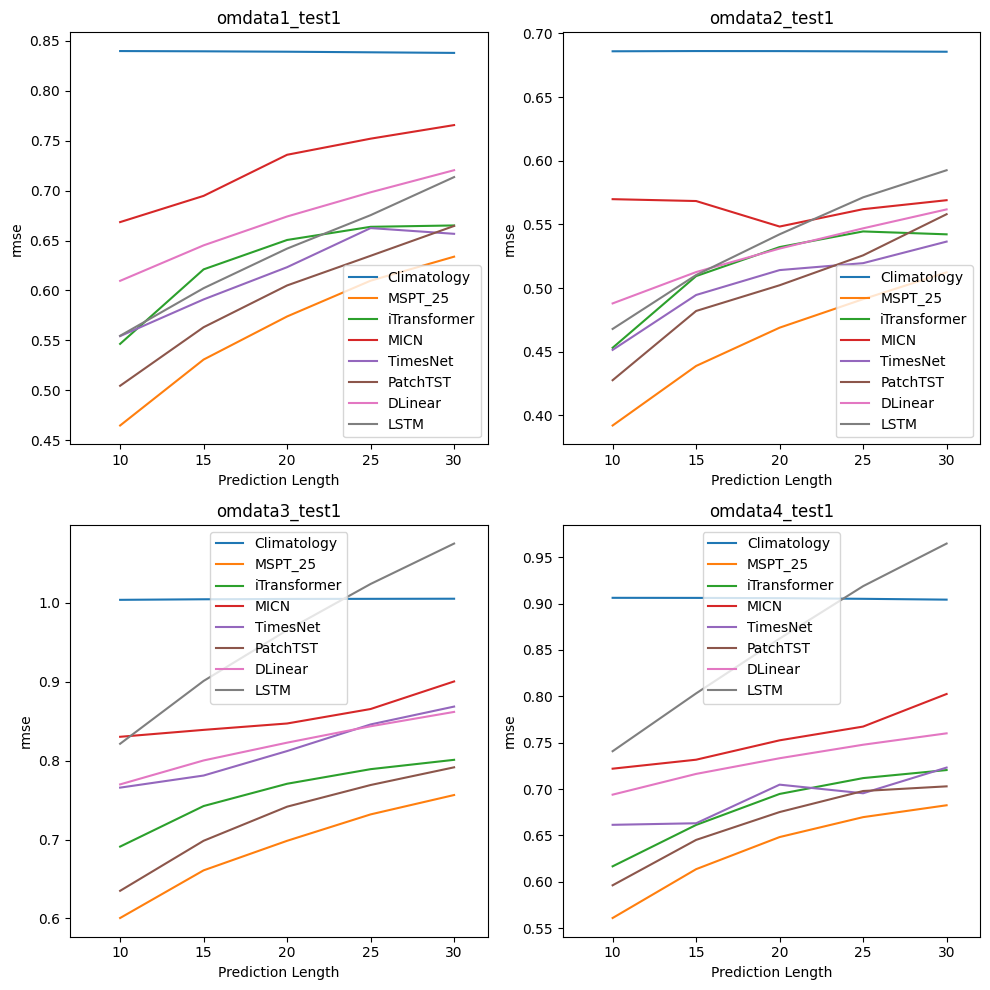

In [7]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
model_names = ['Climatology', 'MSPT_25', 'iTransformer', 'MICN', 'TimesNet', 'PatchTST', 'DLinear', 'LSTM']
dess = ['omdata1_test1', 'omdata2_test1', 'omdata3_test1', 'omdata4_test1']
metric = 'rmse'
for i in range(2):
    for j in range(2):
        des = dess[i*2+j]
        values_dic = {}
        climate_values = []
        txt_file_path = '../result_forecast.txt'
        for pl in [10, 15, 20, 25, 30]:
            climate_values.append(float(extract_metric_values(txt_file_path, 'Climatology', pl, metric, des, '20240527')[0]))
        values_dic['Climatology'] = climate_values
        sns.lineplot(x=[10, 15, 20, 25, 30], y=values_dic['Climatology'], ax=axs[i, j], label='Climatology')
        # axs[i, j].plot([10, 15, 20, 25, 30], values_dic['Climatology'], label='Climatology')
        # print(climate_values)

        txt_file_path = '../result_forecast_B288.txt'
        for _, model_name in enumerate(model_names[1:]):
            values = []
            print(model_name)
            for pl in [10, 15, 20, 25, 30]:
                values.append(float(extract_metric_values(txt_file_path, model_name, pl, metric, des, '20240601')[0]))
            values_dic[model_name] = values
            # axs[i, j].plot([10, 15, 20, 25, 30], values_dic[model_name], label=model_name)
            sns.lineplot(x=[10, 15, 20, 25, 30], y=values_dic[model_name], ax=axs[i, j], label=model_name)
            axs[i, j].set_title(des)
            axs[i, j].set_xlabel('Prediction Length')
            axs[i, j].set_ylabel(metric)
            axs[i, j].set_xlim(7, 32)
            axs[i, j].set_xticks([10, 15, 20, 25, 30])
            # axs[i, j].set_ylim(0.3, 1.3)
            # axs[i, j].set_yticks(np.arange(0.3, 1.3, 0.1))
            axs[i, j].legend()
            # print(values)
        # print(values_dic)
plt.tight_layout()
plt.show()
    


['Record1 data\nmore data', 'Record2 data', 'Record3 data']
